# Should your fund invest in Bitcoin?

## 📖 Background
You work as an analyst at an investment fund in New York. Your CFO wants to explore if it is a good idea to invest some of the fund's assets in Bitcoin. You have to prepare a report on this asset and how it compares to the stock market in general.

# Executive Summary
   In this project, I analyzed the investment value of Bitcoin comparing to S&P500 and gold and built a portfolio that minimized the investment risks. In summary, my analysis found that Bitcoin was a high-return-high-risk asset. Starting from mid-2017, Bitcoin outperformed S&P500 and gold, and it outgrew the inflation rates except in 2015 and 2017. However, it was a highly volatiled asset whose monthly returns could varies between -40% to 50%, comparing to S&P500's -10% to 15% and gold's -7.5% to 10%. Therefore, investing in Bitcoin alone was highly risky. Adding S&P500 and gold in the portfolio could reduce the risks in the portfolio. 

   To minimize risk, I suggested the company to build a portfolio with 42% S&P500, 1.2% Bitcoin, and 56% gold. By mixing the S&P500, gold, and Bitcoin, we could build a low volatility portfolio. However, we sacraficed returns by lowering the risks. Using the bt python library for testing my strategy against purely investing in the S&P500, gold, or Bitcoin, my lowest risk strategies had a 5-year return of 13.73%. This 5-year return rate ourperformed gold's 5-year return (8.45%) but fell short of the 5-year return of S&P500 (17.94%) and the 5-year return of Bitcoin (56.98%). However, the worst year of this strategies was -3.22%, comparing to the worst year of S&P500(-4.57%), gold(-4.15%),and Bitcoin(-74.35%). This showed that my strategy protected the portfolio from the most violatiled year, although sacraficing returns. In conclusion, adding more gold could help reduce the portfolio's risk, while adding more S&P500 and Bitcoin could increase the returns of the portfolio. 


# Data Summary 

#### Bitcoin daily data in US dollars
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the price at the beginning of the trading day
- "high" - the highest price reached that day
- "low" - the lowest price reached that day
- "close" - the price at the closing of the trading day
- "volume" - how many Bitcoin were traded that day

#### S&P 500 daily data
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the index level at the beginning of the trading day
- "high" - the highest level reached that day
- "low" - the lowest level reached that day
- "close" - the level at the closing of the trading day
- "volume" - how many shares in the companies that make up the index were traded that day

#### inflation and gold as monthly data
- "date" - date from September, 2014 to November, 2021
- "gold_usd" - price in usd of gold for that month
- "cpi_us" - the inflation index for the US for that month (cpi = consumer price index)

_CPI data from the [U.S. Bureau of Labor Statistics](https://www.bls.gov/cpi/). Publicly available information_.

# Load Data

In [1]:
import pandas as pd
bitcoin = pd.read_csv('./data/bitcoin-usd.csv', parse_dates=['date'])
bitcoin.head()

,date,open,high,low,close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


In [2]:
sp500 = pd.read_csv('./data/sp500.csv', parse_dates=['date'])
sp500.head()

,date,open,high,low,close,volume
0,2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000
1,2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
2,2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000
3,2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000
4,2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000


In [3]:
monthly_data = pd.read_csv('./data/monthly_data.csv', parse_dates=['date'])
monthly_data.head()

,date,gold_usd,cpi_us
0,2014-09-01,1241.330,237.852
1,2014-10-01,1223.565,238.031
2,2014-11-01,1176.413,237.433
3,2014-12-01,1200.440,236.151
4,2015-01-01,1249.333,234.812


# Load Library

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, fmin, fmin_l_bfgs_b
import scipy.stats

# Part 1. Compare the performance of Bitcoin to S&P 500 and Gold

## Comparing general price trend
In order to compare the performance of Bitcoin, s&p500, and gold, the price trends of each asset were plotted. 

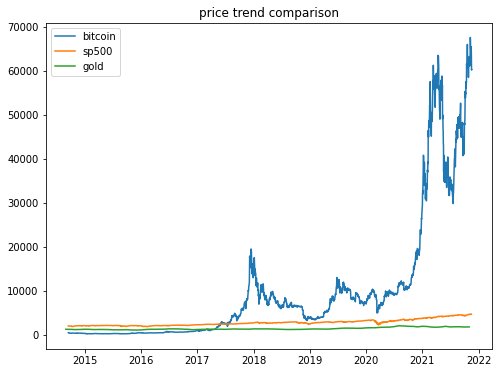

In [5]:
## Plot price trends
plt.figure(figsize = (8,6))
plt.plot(bitcoin.date,bitcoin.close, label = 'bitcoin')
plt.plot(sp500.date,sp500.close, label = 'sp500')
plt.plot(monthly_data.date, monthly_data.gold_usd, label = 'gold')
plt.legend()
plt.title('price trend comparison')
plt.show()

Just by looking at the price trends, bitcoin outperformed s&p500 and gold starting mid-2017. However, comparing daily bitcoin and sp500 prices with monthly gold prices data could be misleading. In order to make more accurate comparison, the monthly returns of bitcoin and sp500 were calculated. 

## Calculate Monthly returns for each assets

In [6]:
## Calculate asset returns
bitcoin['returns'] = bitcoin.close.pct_change()
sp500['returns'] = sp500.close.pct_change()
monthly_data['gold_returns'] = monthly_data['gold_usd'].pct_change()

In [7]:
## Extract the month and year 
monthly_data['date'] = pd.to_datetime(monthly_data['date'],format='%Y%m%d')
monthly_data['year'] = pd.DatetimeIndex(monthly_data['date']).year
monthly_data['month'] = pd.DatetimeIndex(monthly_data['date']).month
bitcoin['date'] = pd.to_datetime(bitcoin['date'],format='%Y%m%d')
bitcoin['year'] = pd.DatetimeIndex(bitcoin['date']).year
bitcoin['month'] = pd.DatetimeIndex(bitcoin['date']).month
sp500['date'] = pd.to_datetime(sp500['date'],format='%Y%m%d')
sp500['year'] = pd.DatetimeIndex(sp500['date']).year
sp500['month'] = pd.DatetimeIndex(sp500['date']).month

In [8]:
## Calculate monthly returns
bitcoin_month = bitcoin.groupby(['year','month'])['returns'].sum()
bitcoin_month= pd.DataFrame(bitcoin_month)
sp500_month = sp500.groupby(['year','month'])['returns'].sum()
sp500_month= pd.DataFrame(sp500_month)
gold_month = pd.DataFrame(monthly_data.groupby(['year','month'])['gold_returns'].sum())


In [9]:
monthly_prices = bitcoin_month.merge(sp500_month, left_index = True,right_index=True, suffixes = ['_btc', '_sp500'])
monthly_prices = monthly_prices.merge(gold_month, left_index = True,right_index=True)
monthly_prices

returns_btc  returns_sp500  gold_returns
year month                                          
2014 9        -0.154446      -0.014469      0.000000
     10       -0.118051       0.024408     -0.014311
     11        0.132413       0.024312     -0.038537
     12       -0.157695      -0.003205      0.020424
2015 1        -0.299671      -0.030419      0.040729
...                 ...            ...           ...
2021 7         0.187079       0.023055     -0.072679
     8         0.141330       0.028881      0.023777
     9        -0.050939      -0.048037     -0.000165
     10        0.356667       0.067431     -0.032752
     11       -0.010983       0.016783      0.015991

[87 rows x 3 columns]

## Plot monthly returns for each assets

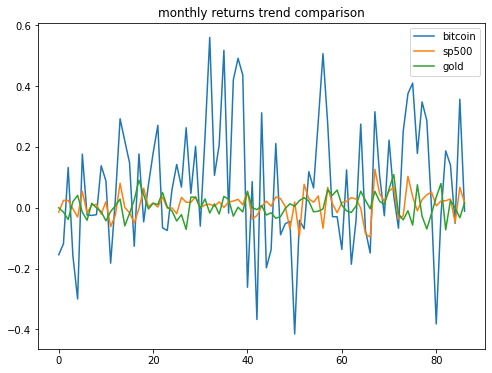

In [10]:
## Plot return trends
plt.figure(figsize = (8,6))
plt.plot(monthly_prices['returns_btc'].values, label = 'bitcoin')
plt.plot(monthly_prices['returns_sp500'].values, label = 'sp500')
plt.plot(monthly_prices['gold_returns'].values, label = 'gold')
plt.legend()
plt.title('monthly returns trend comparison')
plt.show()

Comparing the monthly returns of the three assets, it seemed that the returns of Bitcoin was higher than the returns of S&P500 and gold. However, the volatility of Bitcoin was also higher than S&P500 and gold. 

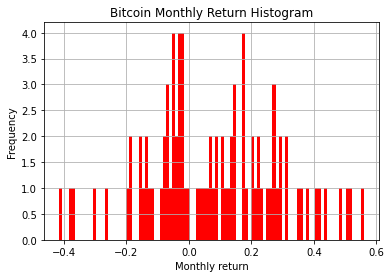

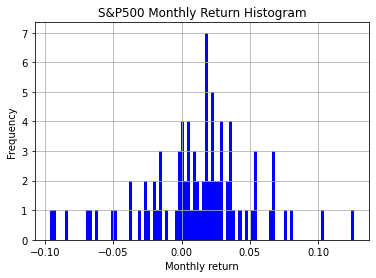

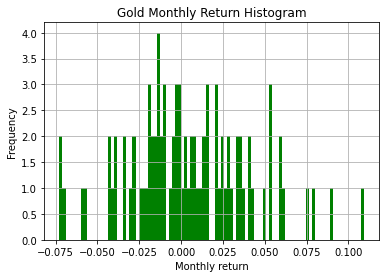

In [11]:
# Plot the histogram
monthly_prices['returns_btc'].hist(bins = 100, color='red')
plt.ylabel('Frequency')
plt.xlabel('Monthly return')
plt.title('Bitcoin Monthly Return Histogram')
plt.show()

monthly_prices['returns_sp500'].hist(bins = 100, color='blue')
plt.ylabel('Frequency')
plt.xlabel('Monthly return')
plt.title('S&P500 Monthly Return Histogram')
plt.show()

monthly_prices['gold_returns'].hist(bins = 100, color='green')
plt.ylabel('Frequency')
plt.xlabel('Monthly return')
plt.title('Gold Monthly Return Histogram')
plt.show()

The histograms of the returns showed that the monthly return of bitcoin was between -40% to 50%, while the monthly return of S&P500 was between -10% to 15%, and the monthly return of gold was between -7.5% to 10%. This showed that although bitcoin was a more volatile asset, it also gave higher returns than the s&p500 and gold. However, it came with greater risk than s&p500 and gold. 

# Part 2: Bitcoin being used as a hedge versus inflation

## Calculate inflation rate
A good asset that could be used to hedge against inflation was an asset whose values grew faster than inflation. An asset whose value out grew the depreciation of money (or the increase of the prices of goods) was what we want to use to hedge against inflation. 
We first need to calculate inflation rate. The formula of inflation rate was defined as the following:

$$
Inflation Rate = \frac{CPI_t - CPI_{t-1}}{CPI_{t-1}}*100
$$
where t equals to the current year. 

In [12]:
## Calculate annual inflation rate
year_data = monthly_data.groupby(['year'])['cpi_us'].mean()
year_data = pd.DataFrame(year_data)
year_data['inflation'] = year_data['cpi_us'].pct_change() 

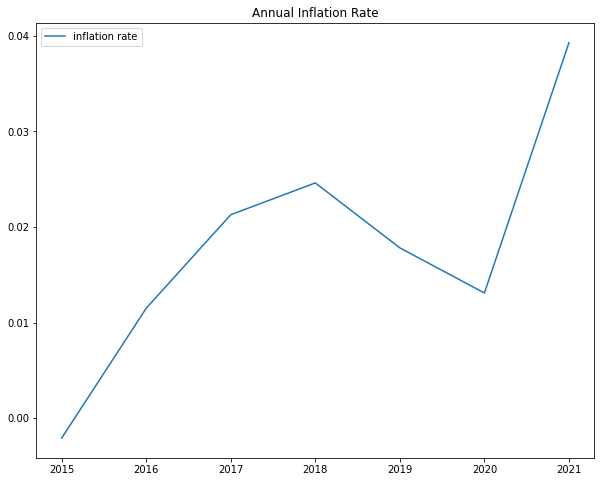

In [13]:
## Inflation Trend
plt.figure(figsize = (10,8))
plt.plot(year_data.index, year_data.inflation, label = 'inflation rate')
plt.title('Annual Inflation Rate')
plt.legend()
plt.show()


In [14]:
print('highest inflation rate:', year_data.inflation.max(), 
     '\nlowest inflation rate:', year_data.inflation.min())

highest inflation rate: 0.03926079780512448 
lowest inflation rate: -0.0020748483096306725


From the above inflation rate trend graph, we could see that inflation gradually grew over the years, with the lowest being -0.2% in 2015 to the highest at 2021 for 3.9%. 
To find a good asset that could be hedged against inflation, the annual return of bitcoin, S&P500, and gold was ploted with inflation rate. 

## Compare annual returns of each asset with the inflation rate

In [15]:
## Calculate annual bitcoin returns
bitcoin_year = bitcoin.groupby(['year'])['close'].mean()
bitcoin_year = pd.DataFrame(bitcoin_year )
bitcoin_year['returns'] = bitcoin_year['close'].pct_change() 

In [16]:
## Calculate annual sp500 returns
sp500_year = sp500.groupby(['year'])['close'].mean()
sp500_year = pd.DataFrame(sp500_year )
sp500_year['returns'] = sp500_year['close'].pct_change() 

In [17]:
## Calculate annual gold returns
gold_year =monthly_data.groupby('year').mean().pct_change()['gold_usd']

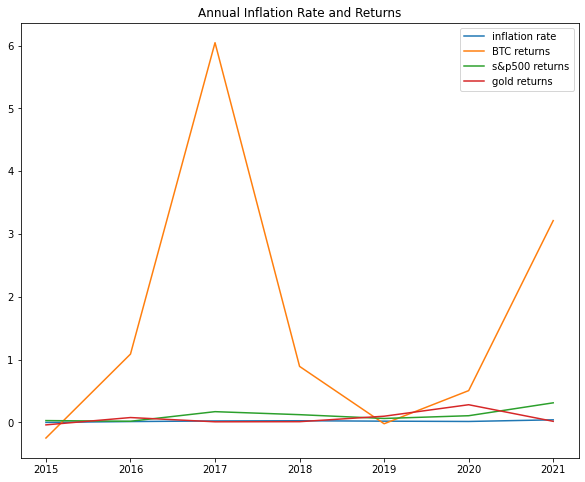

In [18]:
## Returns and Inflation Trend
plt.figure(figsize = (10,8))
plt.plot(year_data.index, year_data.inflation, label = 'inflation rate')
plt.plot(bitcoin_year.index, bitcoin_year.returns, label = 'BTC returns')
plt.plot(sp500_year.index, sp500_year.returns, label = 's&p500 returns')
plt.plot(gold_year.index, gold_year.values, label = 'gold returns')
plt.title('Annual Inflation Rate and Returns')
plt.legend()
plt.show()

From this graph, we can see that Bitcoin outperform both S&P500 and gold in most of the years. It also grew faster than inflation in most of the years. However, it was not consistently outperforming the other assets. In 2015 and 2019, Bitcoin's return was lower than the inflation rate. On the other hand, although the return of the S&P500 was not as high as Bitcoin, it consistently grew faster than inflation over the years. 

Comparing the yearly return of Bitcoin vs. annual inflation rate, bitcoin's return was higher than inflation rate except on 2015 and 2019. This indicated that Bitcoin could be a good hedge asset against inflation. 

# Part 3. Portfolio that minimizes overall risk

## Define portfolio risk and return

To minimize the portfolio's risk, we need to minimize the variance of the portfolio. 

The goal is to achieve the minimum variance. The variance of the portfolio is calculated as:
$$
\sigma^2_p = w_{sp500}^2 \sigma_{sp500}^2 + w_{bitcoin}^2 \sigma_{bitcoin}^2 + w_{gold}^2 \sigma_{gold}^2 +  \\ 2w_{sp500}w_{bitcoin} Cov(sp500, bitcoin) \\ + 2w_{sp500}w_{gold} Cov(sp500, gold) \\ + 2w_{gold}w_{bitcoin} Cov(gold, bitcoin)
$$

Since covariance of x and y equals to the correlation of x and y times the standard devaition of x and y:
$$
\sigma_{xy} = \rho_{xy}*\sigma_x*\sigma_y
$$,
the variance of portfolio is:
$$
\sigma^2_p = w_{sp500}^2 \sigma_{sp500}^2 + w_{bitcoin}^2 \sigma_{bitcoin}^2 + w_{gold}^2 \sigma_{gold}^2 +  \\ 2w_{sp500}w_{bitcoin}\rho_{sp500, bitcoin}*\sigma_{sp500}*\sigma_{bitcoin} \\ + 2w_{sp500}w_{gold} \rho_{sp500, gold}*\sigma_{sp500}*\sigma_{gold}\\ + 2w_{gold}w_{bitcoin} \rho_{gold, bitcoin}*\sigma_{gold}*\sigma_{bitcoin}
$$

The return of the portfolio could be calculated as: 
$$
R_p = w_{sp500}R_{sp500} + w_{bitcoin}R_{bitcoin} + w_{gold}R_{gold}
$$

In [19]:
bitcoin_year_return = bitcoin_year.returns.mean()
sp500_year_return = sp500_year.returns.mean()
gold_year_return = np.nanmean(gold_year.values)

In [20]:
def risk_p(x):
    if 1-x[0]-x[1]>0:
        x3 = 1-x[0]-x[1]
    else:
        x3 = 0
    return var_sp500_month*(x[0]**2)+var_bitcoin_month*(x[1]**2)+var_gold_month*(x3**2)+2*x[0]*x[1]*corr_BTC_sp500*sd_sp500_month*sd_BTC_month+2*x[0]*x3*corr_gold_sp500*sd_sp500_month*sd_gold_month+2*x[1]*x3*corr_gold_BTC*sd_gold_month*sd_BTC_month



In [21]:
def portfolio_return(x):
    if 1-x[0]-x[1] > 0:
        x3 = 1-x[0]-x[1]
    else:
        x3 = 0
    return x[0]*sp500_year_return+x[1]*bitcoin_year_return +x3*gold_year_return


In [22]:
def max_min_norm(value, max_n,min_n):
    
    return (value-min_n)/(max_n-min_n)

In [23]:
## Calculate the variance of each asset
var_bitcoin_month = np.var(bitcoin_month.returns)
var_sp500_month = np.var(sp500_month.returns)
var_gold_month = np.var(gold_month.gold_returns)
print('variance of bitcoin in monthly return: ', var_bitcoin_month, 
      '\nvariance of s&p500 in monthly return: ', var_sp500_month, 
      '\nvariance of gold in monthly return: ', var_gold_month)


variance of bitcoin in monthly return:  0.043672093769061934 
variance of s&p500 in monthly return:  0.0015495730413317991 
variance of gold in monthly return:  0.001278727520127688


In [24]:
## Calculate the standard deviation of each asset
sd_BTC_month = np.sqrt(var_bitcoin_month)
sd_sp500_month = np.sqrt(var_sp500_month) 
sd_gold_month = np.sqrt(var_gold_month)
print('standard deviation of bitcoin in monthly return: ', sd_BTC_month, 
      '\nstandard deviation of s&p500 in monthly return: ', sd_sp500_month, 
      '\nstandard deviation of gold in monthly return: ', sd_gold_month)

standard deviation of bitcoin in monthly return:  0.20897869214123704 
standard deviation of s&p500 in monthly return:  0.039364616616090635 
standard deviation of gold in monthly return:  0.03575929977121599


In [25]:
## Calculate the correlation between each asset


corr_BTC_sp500 = scipy.stats.pearsonr(bitcoin_month.returns, sp500_month.returns)[0]
corr_gold_sp500 = scipy.stats.pearsonr(gold_month.gold_returns, sp500_month.returns)[0]
corr_gold_BTC = scipy.stats.pearsonr(gold_month.gold_returns, bitcoin_month.returns)[0]
print('correlation of bitcoin and s&p500 in monthly return: ', corr_BTC_sp500, 
      '\ncorrelation of s&p500 and gold in monthly return: ', corr_gold_sp500, 
      '\ncorrelation of gold and bitcoin in monthly return: ', corr_gold_BTC)

correlation of bitcoin and s&p500 in monthly return:  0.2703951345940383 
correlation of s&p500 and gold in monthly return:  0.09422928118351284 
correlation of gold and bitcoin in monthly return:  -0.17692009550346405


In [26]:
var_portfolio= []
return_portfolio = []
sp500_weigh = []
btc_weigh = []
all_w = []
w_sp500 = np.arange(0,1.1,0.1)
w_btc = np.arange(0,1.1,0.1)
for w1 in w_sp500:
    for w2 in w_btc:
        if w1+w2>1:
            pass
        else:
            x = (w1,w2)
            sp500_weigh.append(w1)
            btc_weigh.append(w2)
            all_w.append(("{:.1f}".format(w1),"{:.1f}".format(w2)))
            var_portfolio.append(risk_p(x))
            return_portfolio.append(portfolio_return(x))
        

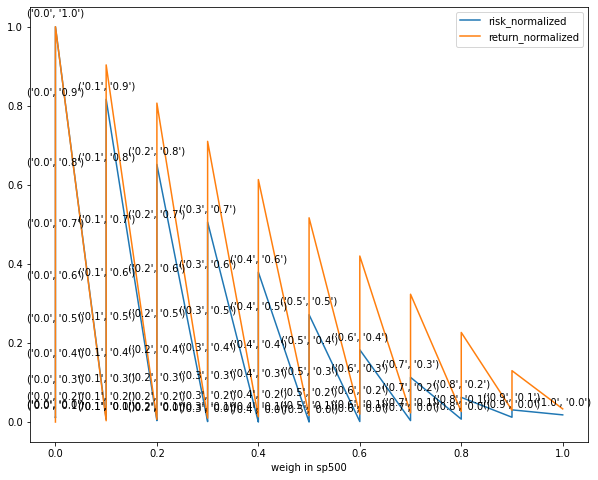

In [27]:
weigh_result = pd.DataFrame({'sp500':sp500_weigh, 'btc':btc_weigh, 'risk':var_portfolio, 'return':return_portfolio, 'all_w': all_w})
weigh_result['risk_norm']=weigh_result.apply(lambda x:max_min_norm(x['risk'], max(weigh_result['risk']), min(weigh_result['risk'])),axis = 1)
weigh_result['return_norm']=weigh_result.apply(lambda x:max_min_norm(x['return'], max(weigh_result['return']), min(weigh_result['return'])),axis = 1)

plt.figure(figsize=(10,8))
plt.plot(weigh_result.sp500, weigh_result.risk_norm, label = 'risk_normalized')
plt.plot(weigh_result.sp500, weigh_result['return_norm'], label = 'return_normalized')

for i in range(0,len(weigh_result)):

    label = str(weigh_result.all_w.iloc[i])

    plt.annotate(label, # this is the text
                 (weigh_result.sp500.iloc[i],weigh_result.risk_norm.iloc[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel('weigh in sp500')

plt.legend()
plt.show()
                       

The graph show that one of the highest return portfolio was to purly invest in Bitcoin. However, the risk was also the highest for this portfolio. In general, adding S&P500 and gold in the portfolio reduced the risk. This also showed that high return investment usually came with high risk. 

Given the above calculation, the portfolio variance calculation will be:

$$
\sigma^2_p = 0.002w_{sp500}^2 + 0.044w_{bitcoin}^2 + 0.001w_{gold}^2 +  \\ 2w_{sp500}w_{bitcoin}*0.270*0.039*0.209 \\ + 2w_{sp500}w_{gold}*0.094*0.039*0.036\\ + 2w_{gold}w_{bitcoin} *-0.177*0.036*0.209
$$

Simplifying this equation, we get:
$$
\sigma^2_p = 0.002w_{sp500}^2 + 0.044w_{bitcoin}^2 + 0.001w_{gold}^2 +  0.0044w_{sp500}w_{bitcoin} + 0.0003w_{sp500}w_{gold} -0.0027w_{gold}w_{bitcoin} 
$$

## Solve minimize variance function to produce strategy

In [28]:
x0 = [0.3,0.5]# random initial guess
res = minimize(risk_p, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})


Optimization terminated successfully.
         Current function value: 0.000760
         Iterations: 70
         Function evaluations: 134


In [29]:
print('Percentage of s&p500: ', res.x[0],
      '\nPercentage of bitcoin: ', res.x[1], 
      '\nPercentage of gold: ', 1-res.x[0]-res.x[1])

Percentage of s&p500:  0.42357482631106935 
Percentage of bitcoin:  0.012883402275778551 
Percentage of gold:  0.5635417714131521


Solving the risk function helped us found the weigh of each assets that minimize the risk of the portfolio. The calculation showed that to minimize overall risk, we need 42% of the portfolio to be S&P500, 1.2% of the portfolio to be Bitcoin, and the rest of the 56% of the portfolio to be gold. 

# Part 4. Run backtest to Compare strategies

Using the bt python library, I could check the validity of the strategy using Yahoo Finance's data. In this backtest session, I downloaded data from three tickers: SPY represented the S&P500, GLD was the ETF for gold, and BTC-USD was bitcoin. 

In here, I tested 2 types of strategies and compared them with the S&P500, gold, and Bitcoin. The first strategy was to follow the portfolio investment strategy that theoratically produce the lowest risks with 42% S&P500, 1.2% bitcoin, and 56% gold. The second strategy was to equally distribute the assets in the portfolio as 1/3 S&P500, 1/3 bitcoin, and 1/3 gold. 


## Download backtest data

In [30]:
import bt
tickers = {
'stocks':['SPY','GLD','BTC-USD'],

}
prices = bt.data.get(tickers['stocks'], clean_tickers=False)

In [31]:
prices = prices.rename(columns = {'BTC-USD':'BTC'})

## Strategies results and summaries

In [32]:

strategy1 = bt.Strategy('strategy1', 
 algos = [
 bt.algos.RunMonthly(),
 bt.algos.SelectAll(),
 bt.algos.WeighSpecified(SPY=res.x[0],BTC=res.x[1], GLD = 1-res.x[0]-res.x[1]),
 bt.algos.Rebalance(),
 ]
)
strategy_equalweigh = bt.Strategy('strategy_equalweigh', 
 algos = [
 bt.algos.RunMonthly(),
 bt.algos.SelectAll(),
 bt.algos.WeighEqually(),
 bt.algos.Rebalance(),
 ]
)



strategy_sp500 = bt.Strategy('strategy_sp500',
 algos = [bt.algos.RunMonthly(),
 bt.algos.SelectAll(),
 bt.algos.SelectThese(['SPY']),
 bt.algos.WeighEqually(),
 bt.algos.Rebalance()],
)

strategy_gold = bt.Strategy('strategy_gold',
 algos = [bt.algos.RunMonthly(),
 bt.algos.SelectAll(),
 bt.algos.SelectThese(['GLD']),
 bt.algos.WeighEqually(),
 bt.algos.Rebalance()],
)

strategy_btc = bt.Strategy('strategy_btc',
 algos = [bt.algos.RunMonthly(),
 bt.algos.SelectAll(),
 bt.algos.SelectThese(['BTC']),
 bt.algos.WeighEqually(),
 bt.algos.Rebalance()],
)

backtest_s1 = bt.Backtest(strategy1,prices)
backtest_equalweigh = bt.Backtest(strategy_equalweigh,prices)
backtest_sp500 = bt.Backtest(strategy_sp500, prices)
backtest_gold = bt.Backtest(strategy_gold, prices)
backtest_btc = bt.Backtest(strategy_btc, prices)

report = bt.run(backtest_s1, backtest_equalweigh,backtest_sp500, backtest_gold, backtest_btc)



<Figure size 432x288 with 0 Axes>

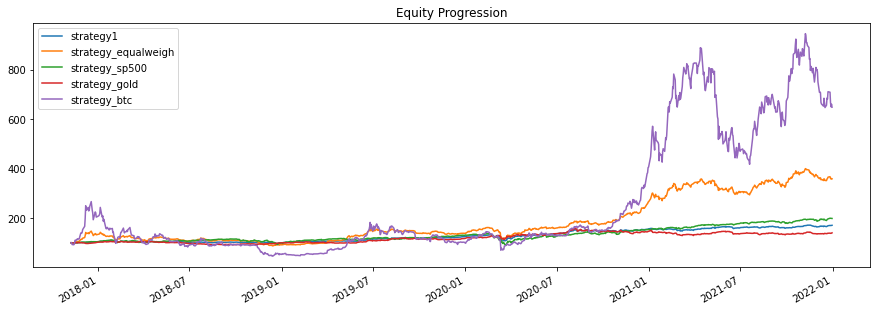

In [33]:
plt.figure()
report.plot()
plt.legend()
plt.show()

In [34]:
report.display()

Stat                 strategy1    strategy_equalweigh    strategy_sp500    strategy_gold    strategy_btc
-------------------  -----------  ---------------------  ----------------  ---------------  --------------
Start                2017-11-08   2017-11-08             2017-11-08        2017-11-08       2017-11-08
End                  2021-12-31   2021-12-31             2021-12-31        2021-12-31       2021-12-31
Risk-free rate       0.00%        0.00%                  0.00%             0.00%            0.00%

Total Return         70.46%       258.59%                98.17%            39.98%           548.33%
Daily Sharpe         1.13         1.21                   0.91              0.65             0.98
Daily Sortino        1.74         1.98                   1.36              1.03             1.63
CAGR                 13.73%       36.08%                 17.94%            8.45%            56.98%
Max Drawdown         -18.87%      -40.72%                -33.71%           -18.77%        

The backtest result presented that if we followed each strategy, what the outcomes of the portfolios could be. For strategy with lowest risk, although the returns was worst than the S&P500, it volatiled less than the equal weigh strategy and the S&P500. The strategy of equal weigh out perform both lowest risk strategy and the S&P500, although it was more volatiled than the other strategies. 

# Conclusion
* In general, Bitcoin was a high return high risk asset compared to S&P500 and gold. 
* In most of the time, Bitcoin outgrew inflation rate. However, it was still a high volatiled asset. 
* Adding S&P500 and gold in the portfolio reduce the risks in the portfolio. 
* By mixing the S&P500, gold, and Bitcoin, we could build a low volatility portfolio. However, we sacraficed returns for lowering the risks. Adding more gold could help reduce the portfolio's risk, while adding more S&P500 and Bitcoin could increase the returns of the portfolio. 
* To minimize risk, I suggested the company to build a portfolio with 42% S&P500, 1.2% bitcoin, and 56% gold. However, this portfolio also produce lower returns than equally distributing weighs in the three types of assets. This suggested that sometimes, greater risk came with greater returns. 
